<a href="https://colab.research.google.com/github/Yididiya16/Data-Preprocessing-for-ML-using-Titanic-Dataset/blob/main/House_price_prediction_using_regression_done_by_Yididiya_Beyene.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

House price prediction is an important task in real estate and urban planning. With the increase in housing data availability, machine learning regression techniques can be used to estimate house prices accurately. This project applies several regression models, including Linear, Multiple Linear, Polynomial, K-Nearest Neighbors, and Decision Tree Regression, to predict house prices based on housing features.

# **Problem Statement**

Predicting house prices manually is difficult because many factors such as house size, number of rooms, location features, and amenities influence the final price. Traditional methods fail to capture complex relationships between these factors. Therefore, an automated and data-driven approach is required to predict house prices more accurately.

# **Objectives**
The main objectives of this project are:


*   To analyze the housing price dataset and preprocess the data

*   To apply different machine learning regression models
*   To predict house prices using unseen test data


*   To evaluate model performance using MAE, MSE, RMSE, and R² metrics

*   To compare regression models and identify the best-performing model
   








**Upload file from google colab**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Housing Price.csv to Housing Price.csv


**Import Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_error,r2_score


**Load Dataset in to Data frame**

In [ ]:
df = pd.read_csv('Housing Price.csv')
df.head(), df.shape,df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


(      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
 0  13300000  7420         4          2        3      yes        no       no   
 1  12250000  8960         4          4        4      yes        no       no   
 2  12250000  9960         3          2        2      yes        no      yes   
 3  12215000  7500         4          2        2      yes        no      yes   
 4  11410000  7420         4          1        2      yes       yes      yes   
 
   hotwaterheating airconditioning  parking prefarea furnishingstatus  
 0              no             yes        2      yes        furnished  
 1              no             yes        3       no        furnished  
 2              no              no        2      yes   semi-furnished  
 3              no             yes        3      yes        furnished  
 4              no             yes        2       no        furnished  ,
 (545, 13),
 None)

**The dataset was preprocessed by using One-Hot Encoding changes encoding categorical variables into numerical values.sothat,Binary features with "yes/no" values are converted into numeric 1/0 format., handling missing data, and separating features and target variables for regression modeling.**

In [32]:

binary_cols = [
    'mainroad', 'guestroom', 'basement',
    'hotwaterheating', 'airconditioning', 'prefarea'
]

for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

if 'furnishingstatus' in df.columns:
    df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

df = df.fillna(0)


for col in df.columns:
    if col != 'price':
        df[col] = df[col].astype(int)

X = df.drop('price', axis=1)
y = df['price']

df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,0,0,0,0,0,2,0,0,0
1,12250000,8960,4,4,4,0,0,0,0,0,3,0,0,0
2,12250000,9960,3,2,2,0,0,0,0,0,2,0,1,0
3,12215000,7500,4,2,2,0,0,0,0,0,3,0,0,0
4,11410000,7420,4,1,2,0,0,0,0,0,2,0,0,0


**Train–Test Split (Unseen Data)**

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training data:", X_train.shape)
print("Testing data (unseen):", X_test.shape)


Training data: (436, 13)
Testing data (unseen): (109, 13)


**Feature Scaling**

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# **Regreesion Models**

**Linear Regression Model**

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)


**Evalution of Linear Regression Model**

 By using regression evalution matrices :-

*   MAE
*   MSE
*   RMSE
*   R2 Score










In [ ]:
print("Linear Regression")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2:", r2_score(y_test, y_pred_lr))


Linear Regression
MAE: 970043.4039201642
MSE: 1754318687330.668
RMSE: 1324506.9600914402
R2: 0.6529242642153176


**Multiple Linear Regression Model**

In [ ]:
mlr_model = LinearRegression()
mlr_model.fit(X_train_scaled, y_train)

y_pred_mlr = mlr_model.predict(X_test_scaled)


**Evalution of Multiple Linear Regression Model**

 By using regression evalution matrices :-

*   MAE
*   MSE
*   RMSE
*   R2 Score










In [ ]:
print("Multiple Linear Regression")
print("MAE:", mean_absolute_error(y_test, y_pred_mlr))
print("MSE:", mean_squared_error(y_test, y_pred_mlr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_mlr)))
print("R2:", r2_score(y_test, y_pred_mlr))


Multiple Linear Regression
MAE: 970043.4039201642
MSE: 1754318687330.668
RMSE: 1324506.9600914402
R2: 0.6529242642153176


**Polynomial Regression Model (Degree = 2)**

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_pred_poly = poly_model.predict(X_test_poly)


**Evalution of Polynomial Regression Model**

 By using regression evalution matrices :-

*   MAE
*   MSE
*   RMSE
*   R2 Score

In [ ]:
print("Polynomial Regression")
print("MAE:", mean_absolute_error(y_test, y_pred_poly))
print("MSE:", mean_squared_error(y_test, y_pred_poly))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_poly)))
print("R2:", r2_score(y_test, y_pred_poly))


Polynomial Regression
MAE: 1034749.2706758833
MSE: 1901686413946.449
RMSE: 1379016.466162188
R2: 0.6237689217365154


**k- Nearest Neighbors (KNN) Regression Model**

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

y_pred_knn = knn_model.predict(X_test_scaled)


**Evalution of k- Nearest Neighbors (KNN) Regression Model**

 By using regression evalution matrices :-

*   MAE
*   MSE
*   RMSE
*   R2 Score

In [ ]:
print("KNN Regression")
print("MAE:", mean_absolute_error(y_test, y_pred_knn))
print("MSE:", mean_squared_error(y_test, y_pred_knn))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_knn)))
print("R2:", r2_score(y_test, y_pred_knn))


KNN Regression
MAE: 999594.6055045872
MSE: 1953996997258.202
RMSE: 1397854.4263471079
R2: 0.6134197563748457


**Decision Tree Regression Model**

In [ ]:
dt_model = DecisionTreeRegressor(
    max_depth=10,
    random_state=42
)

dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)


**Evalution of Decision Tree Regression Model**

 By using regression evalution matrices :-

*   MAE
*   MSE
*   RMSE
*   R2 Score

In [ ]:
print("Decision Tree Regression")
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print("R2:", r2_score(y_test, y_pred_dt))


Decision Tree Regression
MAE: 1194973.9296636085
MSE: 2551053758132.1855
RMSE: 1597201.8526573859
R2: 0.49529759528627837


**Testing with Completely Unseen Data (new data)**

In [38]:

new_house = pd.DataFrame(
    data=np.zeros((1, X.shape[1])),
    columns=X.columns
)

new_house['area'] = 1200
new_house['bedrooms'] = 3
new_house['bathrooms'] = 2
new_house['stories'] = 1
new_house['parking'] = 1

new_house['mainroad'] = 1
new_house['guestroom'] = 0
new_house['basement'] = 0
new_house['airconditioning'] = 1
new_house['hotwaterheating'] = 1
new_house['prefarea'] = 0


new_house['furnishingstatus_semi-furnished'] = 0
new_house['furnishingstatus_unfurnished'] = 1

new_house_scaled = scaler.transform(new_house)

In [39]:
print("Linear:", int(lr_model.predict(new_house_scaled)[0]))
print("Multiple Linear:", int(mlr_model.predict(new_house_scaled)[0]))
print("Polynomial:", int(poly_model.predict(poly.transform(new_house_scaled))[0]))
print("KNN:", int(knn_model.predict(new_house_scaled)[0]))
print("Decision Tree:", int(dt_model.predict(new_house)[0]))

Linear: 4115598
Multiple Linear: 4115598
Polynomial: 3398450
KNN: 3222800
Decision Tree: 4868387


**Visualization for Each Regression Model Based on :-**
  


*   Actual vs Predicted plots






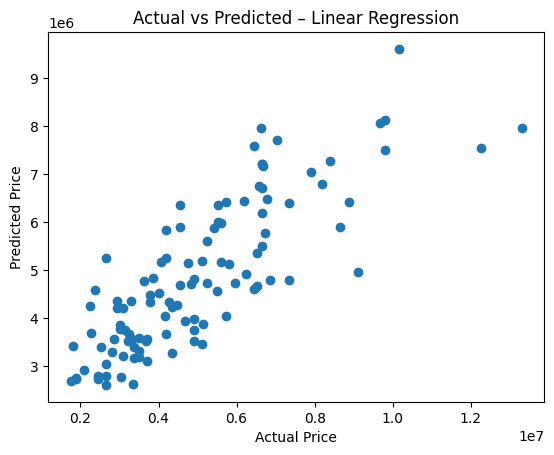

In [ ]:
plt.figure()
plt.scatter(y_test, y_pred_lr)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted – Linear Regression")
plt.show()


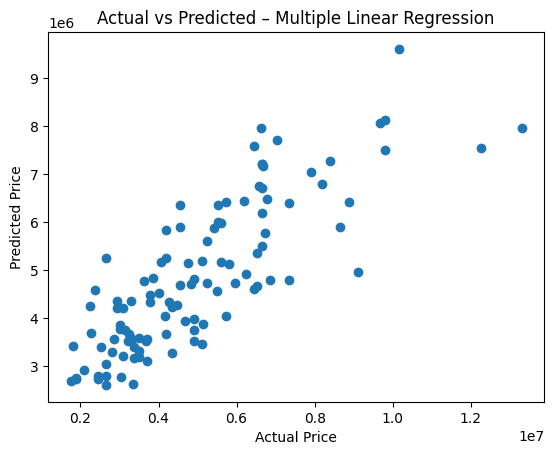

In [33]:
plt.figure()
plt.scatter(y_test, y_pred_mlr)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted – Multiple Linear Regression")
plt.show()


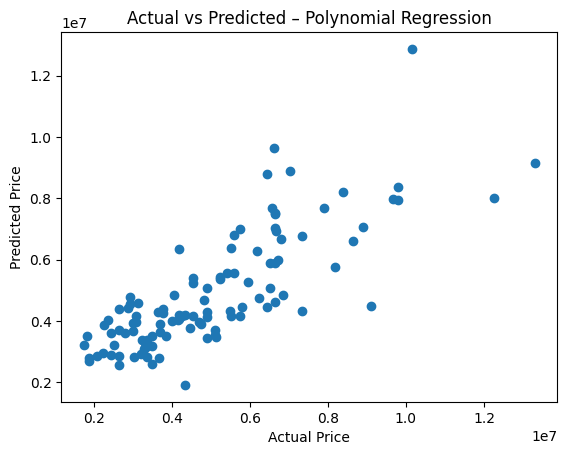

In [ ]:
plt.figure()
plt.scatter(y_test, y_pred_poly)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted – Polynomial Regression")
plt.show()


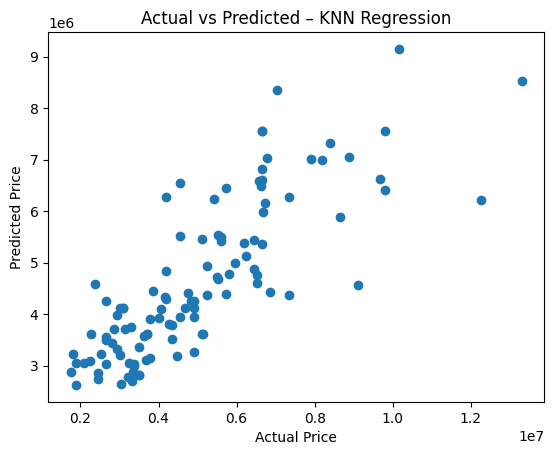

In [ ]:
plt.figure()
plt.scatter(y_test, y_pred_knn)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted – KNN Regression")
plt.show()


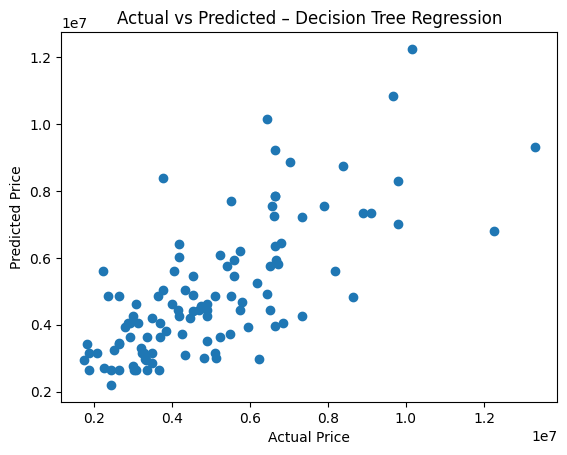

In [34]:
plt.figure()
plt.scatter(y_test, y_pred_dt)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted – Decision Tree Regression")
plt.show()


**Decision Tree Split Visualization**



  This shows how the decision tree makes decisions.






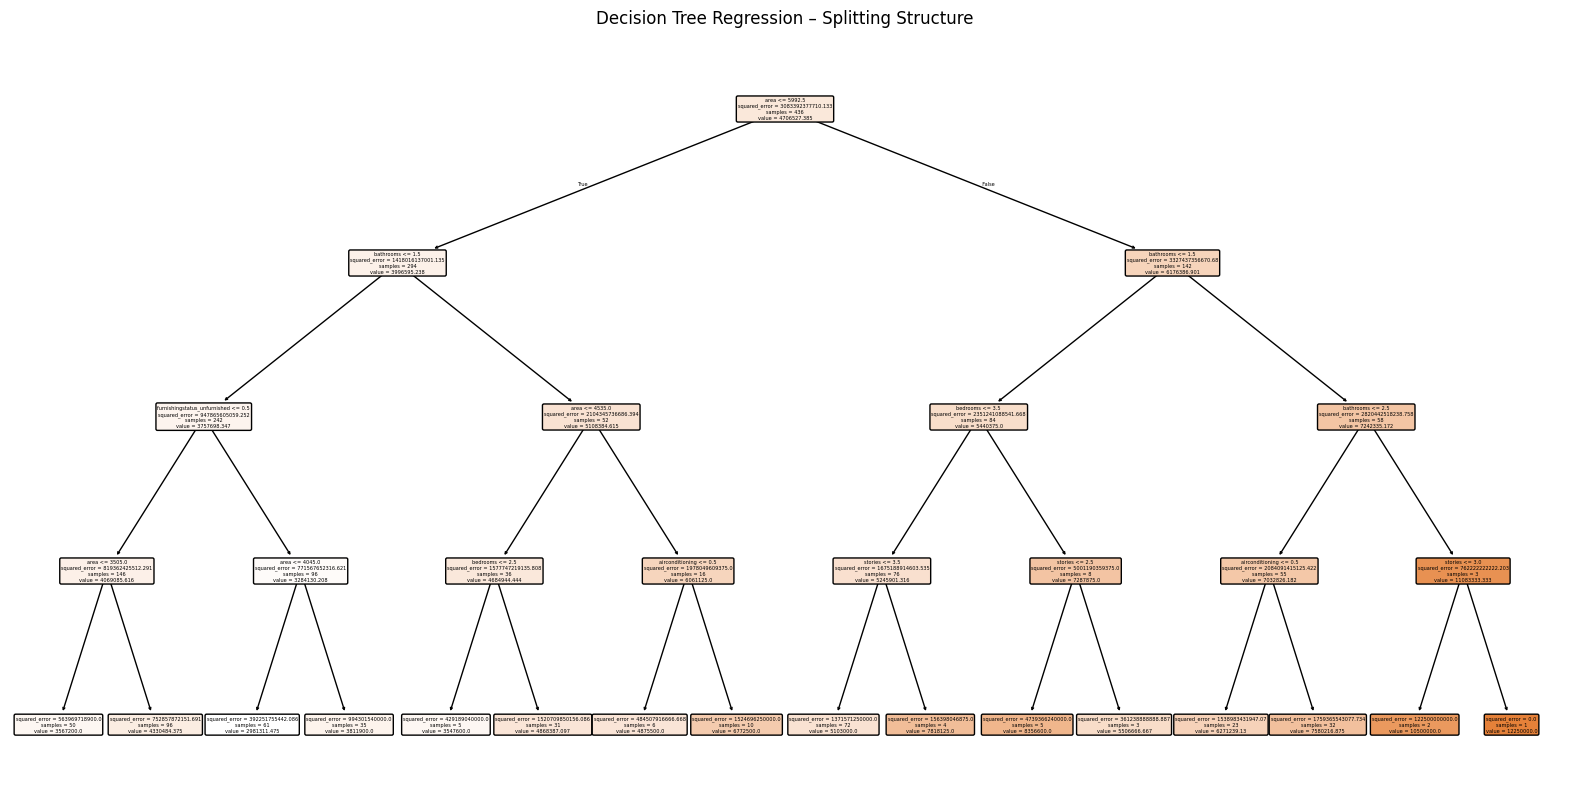

In [35]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(
    dt_model,
    feature_names=X.columns,
    filled=True,
    rounded=True
)
plt.title("Decision Tree Regression – Splitting Structure")
plt.show()


# **Results**

The models were trained on 80% of the data and tested on 20% unseen data. Multiple Linear Regression and Linear Regression Model produced stable and interpretable results, while Polynomial and Decision Tree models captured non-linear relationships. KNN regression performed well with proper scaling. Predicted house prices were realistic and consistent with input features.

# **Conclusion**

This project demonstrates that machine learning regression models can effectively predict house prices based on housing attributes. Among the tested models, Multiple Linear and Linear Regression provided reliable performance with lower prediction errors. The study confirms that data-driven approaches are suitable for real-world house price prediction problems

# **Recommendations**

Based on the results, the following recommendations are made:

*  We use Multiple Linear or Linear Regression for stable house price prediction

*   We Apply proper data preprocessing and feature scaling for better accuracy
*   Collect more housing data to improve model generalization




